In [28]:
exec(open("initKeras.py").read())

In [18]:
# model numbers to retrain, set to false or blank if you want to retrain all the models in DoodleModels. Strictly a list of integers
trainOnlyModels = [ 1, 2 ]
saveModels = True

# #data preparation
inputDir = "F:\\myProjects\\tim209\\filtered by category\\output\\*.npy"
modelDirectory = "F:\\myProjects\\tim209\\doodle\\savedModels\\"
modelGraphDirectory = "F:\\myProjects\\tim209\\doodle\\experiment results\\"
dataUtils = dataUtils( inputDir )
dataUtils.process()

Processing aircraft carrier F:\myProjects\tim209\filtered by category\output\aircraft carrier.npy
Observation #: 20000
label hot vectors #: 20000
Processing airplane F:\myProjects\tim209\filtered by category\output\airplane.npy
Observation #: 20000
label hot vectors #: 20000
Processing alarm clock F:\myProjects\tim209\filtered by category\output\alarm clock.npy
Observation #: 20000
label hot vectors #: 20000
Processing ambulance F:\myProjects\tim209\filtered by category\output\ambulance.npy
Observation #: 20000
label hot vectors #: 20000
Processing angel F:\myProjects\tim209\filtered by category\output\angel.npy
Observation #: 20000
label hot vectors #: 20000
Processing animal migration F:\myProjects\tim209\filtered by category\output\animal migration.npy
Observation #: 20000
label hot vectors #: 20000
Processing ant F:\myProjects\tim209\filtered by category\output\ant.npy
Observation #: 20000
label hot vectors #: 20000
Processing anvil F:\myProjects\tim209\filtered by category\output\

In [19]:
(images, labels, classToLevels ) = dataUtils.getData()
(imagesR, labelsR, classToLevelsR ) = dataUtils.getRandomizedData()
images = dataUtils.reshapeDataForKeras( images )
imagesR = dataUtils.reshapeDataForKeras( imagesR )

(200000, 784) (200000, 10) {'aircraft carrier': 0, 'airplane': 1, 'alarm clock': 2, 'ambulance': 3, 'angel': 4, 'animal migration': 5, 'ant': 6, 'anvil': 7, 'apple': 8, 'arm': 9}


In [20]:
doodleModels = DoodleModels(images, labels)

train X: (160000, 28, 28, 1)
test X: (40000, 28, 28, 1)
train Y: (160000, 10)
test Y: (40000, 10)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
flatten_6 (Flatten)          (None, 288)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)                9248      
__________

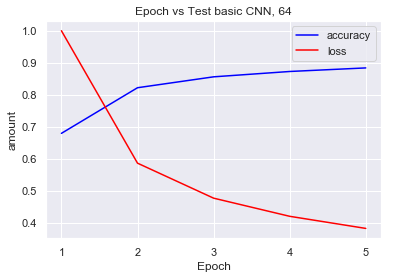

In [25]:
epochSize = 5
batchSize = 500
histories = []
for i in range(5):
    
    modelNo = i + 1
    
    #1 filter if needed
    if type( trainOnlyModels ) == list and len( trainOnlyModels ) > 0 and modelNo not in trainOnlyModels:
        print( "Skipping model #", modelNo )
        continue
        
    #2 get and train model
    model = doodleModels.getModel( modelNo )
    history, testLoss, testAcc = doodleModels.runModel( model, epochSize, batchSize )
    histories.append( ( model, history, testLoss, testAcc ) )
    
    #3 save model performance plot
    plotSavePath = modelGraphDirectory + model.name + "_e" + str( epochSize ) + "_b" + str( batchSize ) + ".png"
    doodleModels.plotModelTrainPerformance( model, plotSavePath )
    
    #4 save trained model
    if saveModels == True:
        modelPath = modelDirectory + model.name + "_e" + str( epochSize ) + "_b" + str( batchSize ) + "_Pa.h5"
        model.save( modelPath )
        print( "saved frozen model at", modelPath )


(0.86, 0.3712, 0.33999999999999997)

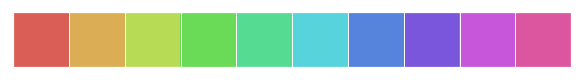

In [26]:
pal = sns.color_palette("hls", 10)
sns.palplot(pal)
pal[0]

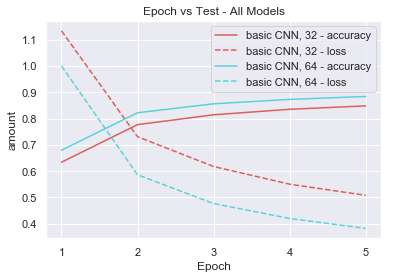

In [35]:
#print all model graph
plt.close()
colorPalette = sns.color_palette("hls", len( histories ) )
colorIndex = 0
for ( model, history, testLoss, testAcc ) in histories:
    epochX = np.arange( len( history.epoch ) ) + 1
    
    plt.plot( epochX, history.history['categorical_accuracy'], color = colorPalette[ colorIndex] , label = model.name + " - accuracy" )
    plt.plot( epochX, history.history['loss'], color = colorPalette[ colorIndex], label = model.name + " - loss", linestyle = '--' )

    plt.title( 'Epoch vs Test - All Models' )
    plt.xlabel( "Epoch" )
    plt.ylabel( "amount" )
    plt.xticks( epochX )
    plt.legend()
    colorIndex = colorIndex + 1

plt.savefig( modelGraphDirectory + "all-models-" + datetime.now().strftime( "%Y-%M-%d %Hh%Mm%Ss" ) )

In [29]:
x = datetime.now()

In [30]:
x

datetime.datetime(2018, 12, 8, 20, 45, 45, 190537)

In [32]:
x.strftime( "%Y-%M-%d %Hh%Mm%Ss" )

'2018-45-08 20h45m45s'